#### Importing the required libraries

In [853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [854]:
# Reading the dataset
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Dataset column information
Survived: 0 = No, 1 = Yes

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp: No of siblings / spouses aboard the Titanic

parch: No of parents / children aboard the Titanic

ticket: Ticket number

cabin: Cabin number

embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [855]:
df.shape

(891, 12)

In [856]:
df.size

10692

In [857]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [858]:
# Checking for any missing value in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [860]:
# Shows Cont of unique values for each features
nunique = df.nunique(dropna=False)
nunique

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [861]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Cleaning data and handling missing data 

In [862]:
# There are missing values in Age,Cabin and Embarked columns
df['Age'].isnull().sum()

177

In [863]:
df['Cabin'].isnull().sum()

687

In [864]:
df['Embarked'].isnull().sum()

2

In [865]:
# Replacing the Age column by mean value since the data normally distributed.
mean=df['Age'].mean()
mean
df['Age'] = df['Age'].fillna(mean)

In [866]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [867]:
# Since there are 2 missing value in Embarked column we can replace by most frequent data
value=(df['Embarked'].value_counts().idxmax())
df['Embarked']=df['Embarked'].fillna(value)

In [868]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [869]:
df['Cabin'].isnull().sum()

687

In [870]:
# Keeping original dataframe intact
new_df=df.copy()

In [871]:
new_df.drop('Cabin',axis=1,inplace=True)

In [872]:
# Dropping all the other unecessary column as well, which won't be useful in predicting the survival of person.
columns=['PassengerId','Name','Ticket']
new_df.drop(columns,axis=1,inplace=True)

In [873]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [874]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

####  Missing values are handled in Age,Embarked and cabin by using different to approaches to all 3 of them

### Data Exploration (EDA)

0    549
1    342
Name: Survived, dtype: int64

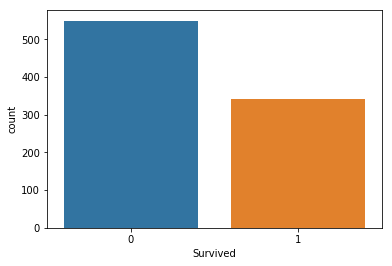

In [875]:
# Survived coutplot
sn.countplot(df['Survived'])
new_df['Survived'].value_counts()

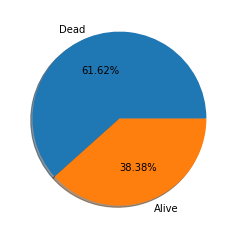

In [876]:
# Pie chart for class variable Survived
labels='Dead','Alive'
fig,ax=plt.subplots()
ax.pie(new_df['Survived'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

In [877]:
# Showing the features for the new columns
new_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

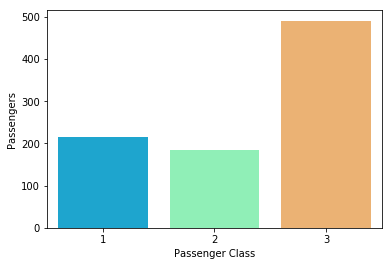

In [878]:
# Passenger class distribution
sn.countplot(x='Pclass',data=new_df,palette='rainbow')
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()

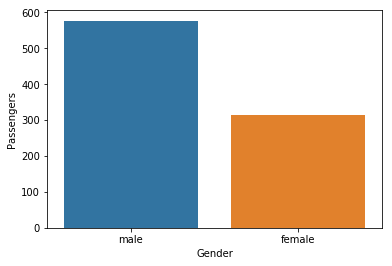

In [879]:
# Sex
sn.countplot(new_df['Sex'])
plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.show()

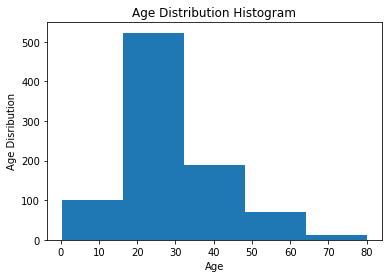

In [880]:
# Age
plt.hist(new_df['Age'],bins=5)
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.show()

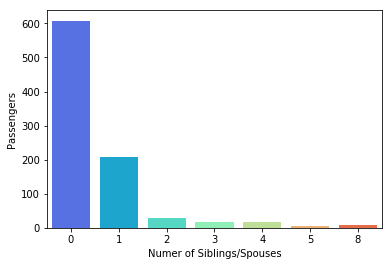

In [881]:
# No of Sibling each passenger had
sn.countplot(new_df['SibSp'],palette='rainbow')
plt.xlabel('Numer of Siblings/Spouses')
plt.ylabel('Passengers')
plt.show()

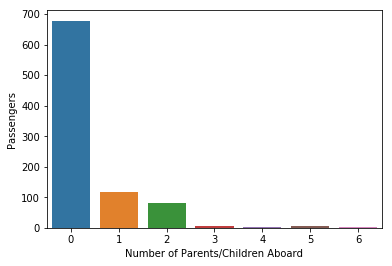

In [882]:
# Numbmer of parent/children aboard.
sn.countplot(new_df['Parch'])
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Passengers')
plt.show()

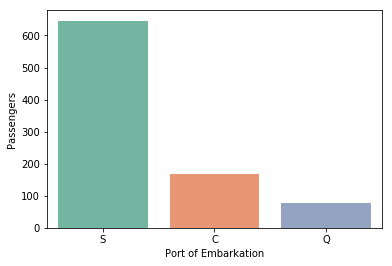

In [883]:
# Plot showing counts of embarked column
sn.countplot(x='Embarked', data=new_df,palette='Set2')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

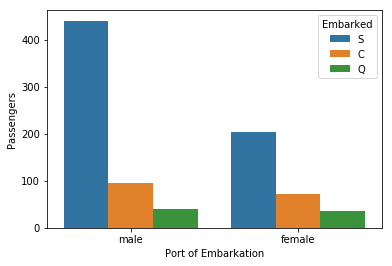

In [884]:
# Plot countplot of Sex by Embarked
sn.countplot(x='Sex', hue='Embarked', data=new_df)
plt.xlabel('Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

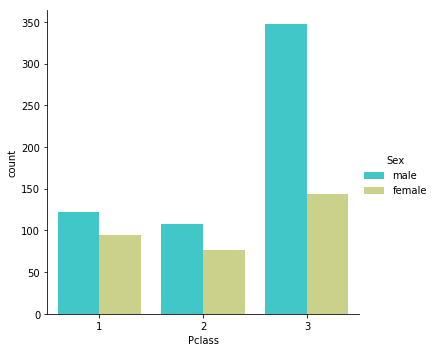

In [885]:
#Passenger class vs Passenger plot with Gender
sn.factorplot('Pclass', data=df, kind="count", hue='Sex',palette='rainbow')

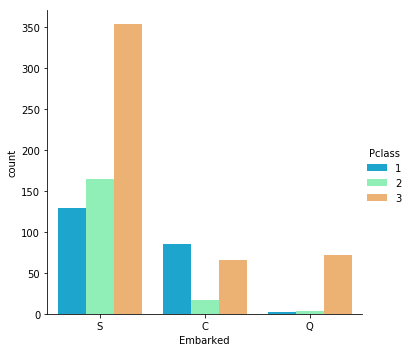

In [886]:
sn.factorplot('Embarked', data=new_df, kind="count", hue='Pclass',palette='rainbow')

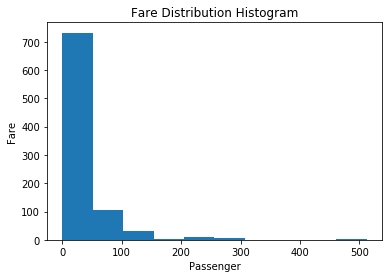

In [887]:
#Fare
new_df.Fare.plot(kind='hist')
plt.ylabel("Fare")
plt.xlabel("Passenger")
plt.title("Fare Distribution Histogram")
plt.show()

### Comparing the target varible survived with singnificant features.

In [888]:
# Performing data exploration on the dataset with the respect to survival rate

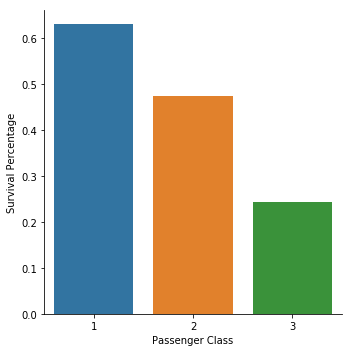

In [889]:
# Plotting the survival percentage with respect to Pclass
sn.factorplot(x='Pclass', y='Survived', data=new_df, kind='bar',ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage')
plt.show()

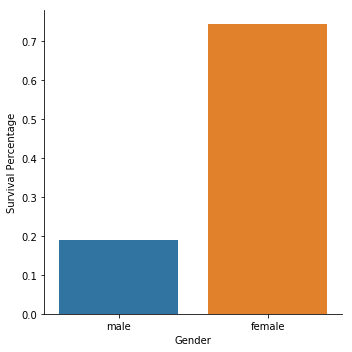

In [890]:
# Plotting the survival percentage with respect to Sex
sn.factorplot(x='Sex', y='Survived', data=new_df, kind='bar',ci=None)
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.show()

In [891]:
new_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

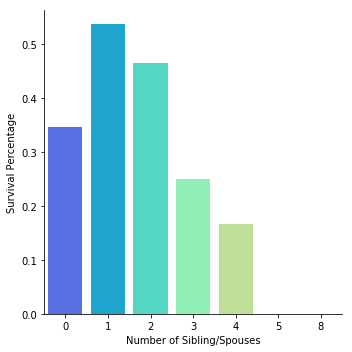

In [892]:
# Plotting the survival percentage with respect to Pclass
sn.factorplot(x='SibSp', y='Survived', data=new_df, kind='bar',palette='rainbow',ci=None)
plt.xlabel('Number of Sibling/Spouses')
plt.ylabel('Survival Percentage')
plt.show()

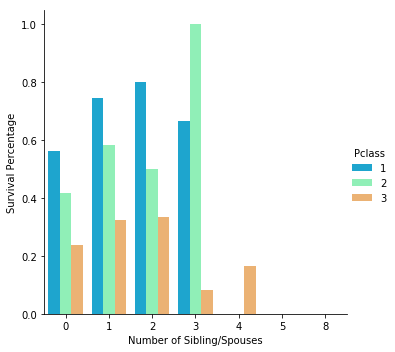

In [893]:
# Plotting the survival percentage with respect to Number of siblings grouping by class
sn.factorplot(x='SibSp', y='Survived',hue='Pclass',data=new_df, kind='bar',palette='rainbow',ci=None)
plt.xlabel('Number of Sibling/Spouses')
plt.ylabel('Survival Percentage')
plt.show()

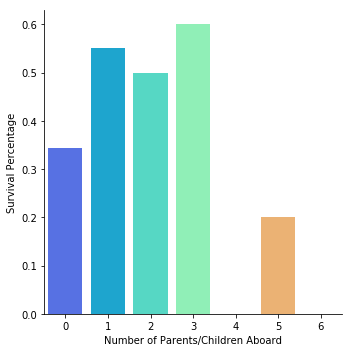

In [894]:
# Plotting the survival percentage with respect to number of parent/childrens
sn.factorplot(x='Parch', y='Survived', data=new_df, kind='bar',palette='rainbow',ci=None)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Percentage')
plt.show()

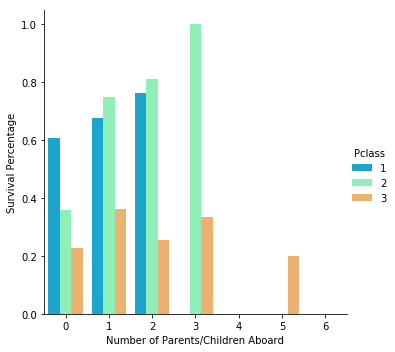

In [895]:
# Plotting the survival percentage with respect to number of parent/childrens
sn.factorplot(x='Parch', y='Survived', data=new_df,hue='Pclass' ,kind='bar',palette='rainbow',ci=None)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Percentage')
plt.show()

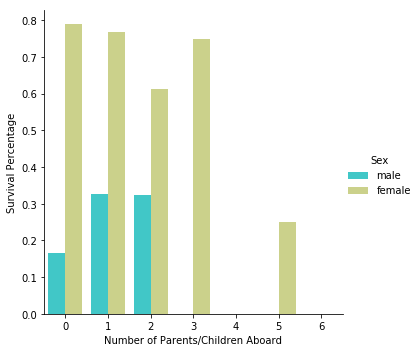

In [896]:
# Plotting the survival percentage with respect to number of parent/childrens
sn.factorplot(x='Parch', y='Survived', data=new_df,hue='Sex',kind='bar',palette='rainbow',ci=None)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Percentage')
plt.show()

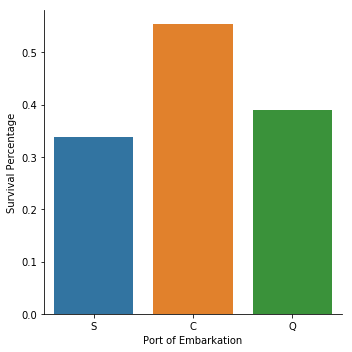

In [897]:
# Plot rate of survival of Embarked
sn.factorplot(x='Embarked', y='Survived', data=new_df, kind='bar', ci=None)
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Percentage')
plt.show()

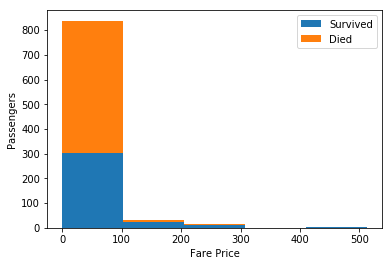

In [898]:
# Plotting histogram of survivalship by fare
plt.hist([new_df[new_df['Survived']==1]['Fare'], new_df[new_df['Survived']==0]['Fare']], 
         stacked=True, bins = 5,label = ['Survived','Died'])
plt.xlabel('Fare Price')
plt.ylabel('Passengers')
plt.legend()
plt.show()

### Plotting heat map 

In [899]:
# To see the correlation betwenn target variables and features.
cor=new_df.corr()
cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


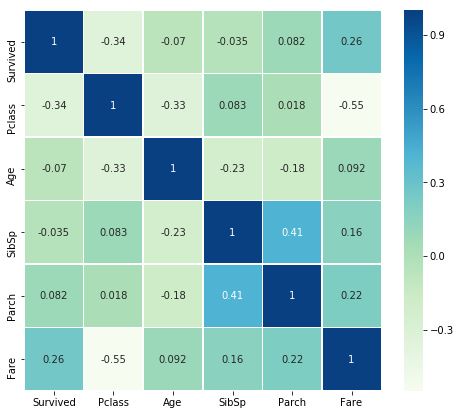

In [900]:
#plotting heatmap
fig, axis = plt.subplots(figsize=(8, 7))
sn.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

### Encoding the categorical data into numerical features

In [901]:
#sex column
new_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [902]:
#Emabrked column
new_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [903]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['Sex']=le.fit_transform(new_df['Sex'])
new_df['Embarked']=le.fit_transform(new_df['Embarked'])

In [904]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Spliiting of the data 

In [905]:
from sklearn.model_selection import train_test_split
x=new_df.drop("Survived",axis=1)
y=new_df["Survived"]

In [1]:
from sklearn.metrics import accuracy_score

#### Finding the best random state

In [906]:
from sklearn.tree import DecisionTreeClassifier
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.8547486033519553 on random state 4


In [907]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

###  Applying scaling technique to the features

In [908]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

### Applying algorithm on the dataset

Accuracy of Random Forest Classificarion is  83.79888268156425
Cross validation score 80.02989587511398
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       119
           1       0.80      0.68      0.74        60

   micro avg       0.84      0.84      0.84       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.84      0.84      0.83       179


 Confusion Matrix


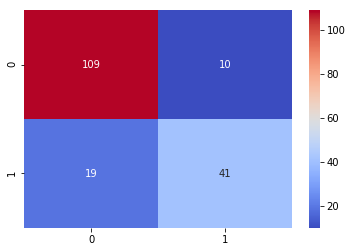

In [909]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
#using Random forest classifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
CV1=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",CV1*100)
rfc_acc1=classification_report(y_test,pred)
print(rfc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy of Support Vector Classification is  84.35754189944134
Cross validation score 67.8108311017818
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       119
           1       0.85      0.65      0.74        60

   micro avg       0.84      0.84      0.84       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.84      0.84       179


 Confusion Matrix


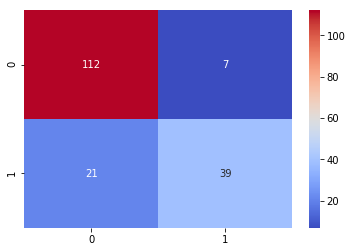

In [910]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=133)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
CV2=cross_val_score(svc,x,y,cv=5).mean()
print("Cross validation score",CV2*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy of Decision Tree classification is  86.03351955307262
Cross validation score 76.77584867225787
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       119
           1       0.87      0.68      0.77        60

   micro avg       0.86      0.86      0.86       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.86      0.86      0.86       179


 Confusion Matrix


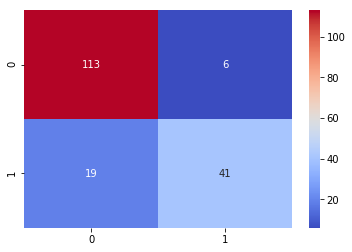

In [911]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
CV3=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",CV3*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using logistic regression model is 83.24022346368714
Cross validation score 79.12663261444925
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       119
           1       0.79      0.68      0.73        60

   micro avg       0.83      0.83      0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179


 Confusion Matrix


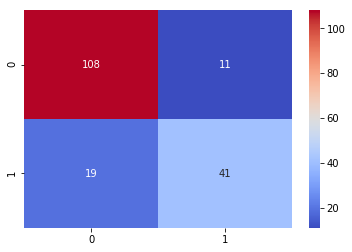

In [912]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
CV4=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",CV4*100)
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")


Accuracy score using gradient boosting classifier model is 84.35754189944134
Cross validation score 81.26084346087133
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       119
           1       0.79      0.73      0.76        60

   micro avg       0.84      0.84      0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


 Confusion Matrix


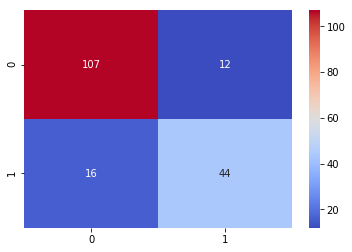

In [913]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
CV5=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",CV5*100)
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

In [918]:
model=['Random Forest Classifier','Support Vector Classifier','Decision Tree Classifier',
       'Logistic Regression','Gradient boosting classifier']
acc=[rfc_acc*100,svc_acc*100,dtc_acc*100,lr_acc*100,gbc_acc*100]

cv_score=[CV1*100,CV2*100,CV3*100,CV4*100,CV5*100]
diff=[acc[0]-cv_score[0],acc[1]-cv_score[1],acc[2]-cv_score[2],acc[3]-cv_score[3],acc[4]-cv_score[4]]
diff
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'CV_score':cv_score,'Diff':diff})
result
# Creting dataframe to store accuracyand cv score of all the models.

,Model,Accuracy_score,CV_score,Diff
0,Random Forest Classifier,83.798883,80.029896,3.768987
1,Support Vector Classifier,84.357542,67.810831,16.546711
2,Decision Tree Classifier,86.033520,76.775849,9.257671
3,Logistic Regression,83.240223,79.126633,4.113591
4,Gradient boosting classifier,84.357542,81.260843,3.096698


### Applying hyperparameter tuning to the best model 

In [920]:
from sklearn.model_selection import GridSearchCV

In [1045]:
parameters= {
    'n_estimators': [10,60,80],
    #'loss': ['deviance', 'exponential'],
    'max_depth': [1,3],
    'criterion':['friedman_mse', 'mse'],
    'learning_rate':[0.5,0.8]
    }

In [1046]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [1047]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 60, 80], 'max_depth': [1, 3], 'criterion': ['friedman_mse', 'mse'], 'learning_rate': [0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1048]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 80}

In [1051]:
Final_model=GradientBoostingClassifier(n_estimators= 80,criterion='friedman_mse',learning_rate=0.5,max_depth=3)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Gradient boosting classifier is ",acc_final*100)

Accuracy of the model using Gradient boosting classifier is  86.59217877094973


In [1058]:
# Plotting Roc curve and roc_auc value for predcited probabalities
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [1059]:
#Receiver operator charactersitics(ROC)
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [1060]:
#False positive rate
fpr

array([0.        , 0.07563025, 1.        ])

In [1061]:
# True positive rate
tpr

array([0.  , 0.75, 1.  ])

In [1062]:
thresholds

array([2, 1, 0], dtype=int64)

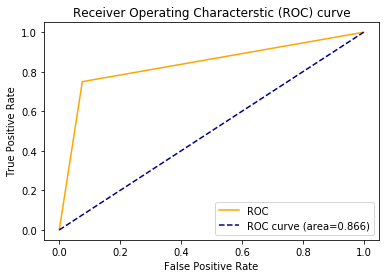

In [1064]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

### Saving the model

In [1065]:
from sklearn.externals import joblib

In [1066]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']